Analysis:
1. As the latitude moves closer to the equator, temperature increases.
2. There seems to be no discernible trend concerning a cities latitude in relation to its wind speed or cloudiness.
3. Just because a country is closer to the equator and has a warmer temperature, does not necessarily mean the humidity is more. In fact, the humidity is higher in places that could be considered colder, like the poles. 

In [46]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import numpy as np
import datetime 
today = datetime.datetime.today().strftime('%Y-%m-%d')


In [2]:
#Configure api
#OpenWeatherMap Api Key
key = "e7604e67af391c6626ebac727adc2e59"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial" 

In [22]:
#Set up list of randomly generated longitude and latitude
citydf = pd.DataFrame()
citydf["Latitude"] = [(np.random.uniform(-90, 90)) for x in range (700)]
citydf["Longitude"]  = [(np.random.uniform(-180, 180)) for x in range (700)]

city_list = []
country_list = []
for index, row in citydf.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    city_list.append(city.city_name)
    country_list.append(city.country_code)
citydf["City"] = city_list
citydf["Country"] = country_list

citydf.head()

,Latitude,Longitude,City,Country
0,-1.546541,-142.544766,atuona,pf
1,82.896223,117.404852,saskylakh,ru
2,24.194745,-6.346182,taoudenni,ml
3,-14.865661,-34.026929,conde,br
4,-78.928112,-42.655207,ushuaia,ar


# Perform API Calls

In [24]:
# Create empty columnns for data
citydf["Cloudiness"] = ""
citydf["Date"] = ""
citydf["Humidity"] = ""
citydf["Max Temp"] = ""
citydf["Wind Speed"] = ""


# Counter
row_count = 0

# Loop through 
for index, row in citydf.iterrows():
     
    # Create endpoint url 
    city = row["City"]
    target_url = url + "&units=" + units + "&appid=" + key + "&q=" + city

    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count += 1

    data = requests.get(target_url).json()
    try:
        clouds = data['clouds']['all']
        date = data['dt']
        humidity = data['main']['humidity']
        temp = data['main']['temp_max']
        wind = data['wind']['speed']
        citydf.set_value(index, "Cloudiness", clouds)
        citydf.set_value(index, "Date", date)
        citydf.set_value(index, "Humidity", humidity)
        citydf.set_value(index, "Max Temp", temp)
        citydf.set_value(index, "Wind Speed", wind)
    except:
        print("Missing Data")


Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=atuona
Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=saskylakh
Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=taoudenni
Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=conde
Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ushuaia
Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=aflu
Missing Data
Now retrieving city # 6
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=lebu
Now retrieving city # 7
http://api.openw

Now retrieving city # 60
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=longyearbyen
Now retrieving city # 61
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=maragogi
Now retrieving city # 62
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ushuaia
Now retrieving city # 63
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=salalah
Now retrieving city # 64
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=port alfred
Now retrieving city # 65
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=carutapera
Now retrieving city # 66
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=jamestown
Now retrieving city # 67
h

Now retrieving city # 121
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=tiksi
Now retrieving city # 122
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=esperance
Now retrieving city # 123
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=smithers
Now retrieving city # 124
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=taolanaro
Missing Data
Now retrieving city # 125
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=leh
Now retrieving city # 126
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=tual
Now retrieving city # 127
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=punta arenas
Now retrieving city 

Missing Data
Now retrieving city # 185
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=talnakh
Now retrieving city # 186
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=yar-sale
Now retrieving city # 187
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=hermanus
Now retrieving city # 188
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=taolanaro
Missing Data
Now retrieving city # 189
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=fuerte
Now retrieving city # 190
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=saskylakh
Now retrieving city # 191
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ushuaia
Now

Now retrieving city # 245
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=udachnyy
Now retrieving city # 246
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=tsihombe
Missing Data
Now retrieving city # 247
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=tiksi
Now retrieving city # 248
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=saldanha
Now retrieving city # 249
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=mar del plata
Now retrieving city # 250
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=menongue
Now retrieving city # 251
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=komsomolskiy
Now retr

Now retrieving city # 310
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=kaili
Missing Data
Now retrieving city # 311
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=provideniya
Now retrieving city # 312
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=portland
Now retrieving city # 313
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=rikitea
Now retrieving city # 314
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=atambua
Now retrieving city # 315
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=mataura
Missing Data
Now retrieving city # 316
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=east london
N

Now retrieving city # 369
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ushuaia
Now retrieving city # 370
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=christchurch
Now retrieving city # 371
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=narsaq
Now retrieving city # 372
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=mayumba
Now retrieving city # 373
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=karamea
Missing Data
Now retrieving city # 374
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=illoqqortoormiut
Missing Data
Now retrieving city # 375
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=kou

Now retrieving city # 427
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=chuy
Now retrieving city # 428
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=cape town
Now retrieving city # 429
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=camacha
Now retrieving city # 430
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ballina
Now retrieving city # 431
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ndioum
Now retrieving city # 432
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=hilo
Now retrieving city # 433
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=bluff
Now retrieving city # 434
http://api.open

Now retrieving city # 486
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=khatanga
Now retrieving city # 487
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=aklavik
Now retrieving city # 488
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=jamestown
Now retrieving city # 489
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=kavaratti
Now retrieving city # 490
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=upernavik
Now retrieving city # 491
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=longyearbyen
Now retrieving city # 492
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=sasykoli
Now retrieving city #

Missing Data
Now retrieving city # 551
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=punta arenas
Now retrieving city # 552
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=bolshoye ignatovo
Missing Data
Now retrieving city # 553
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=barentsburg
Missing Data
Now retrieving city # 554
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=mataura
Missing Data
Now retrieving city # 555
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=yellowknife
Now retrieving city # 556
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=punta arenas
Now retrieving city # 557
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&app

Now retrieving city # 609
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ushuaia
Now retrieving city # 610
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=dikson
Now retrieving city # 611
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=kruisfontein
Now retrieving city # 612
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=chahal
Now retrieving city # 613
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=busselton
Now retrieving city # 614
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=longyearbyen
Now retrieving city # 615
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=butaritari
Now retrieving city #

Now retrieving city # 669
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=aitape
Now retrieving city # 670
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=marakkanam
Now retrieving city # 671
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=ribeira grande
Now retrieving city # 672
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=marsh harbour
Now retrieving city # 673
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=hermanus
Now retrieving city # 674
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=matsanga
Missing Data
Now retrieving city # 675
http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e7604e67af391c6626ebac727adc2e59&q=busselton
No

In [25]:
#drop rows with missing data
citydf.replace('', np.nan, inplace=True)
citydf.dropna(inplace=True)
len(citydf)

615

In [26]:
citydf.head()

,Latitude,Longitude,City,Country,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,-1.546541,-142.544766,atuona,pf,44.0,1.513893e+09,100.0,78.83,13.49
1,82.896223,117.404852,saskylakh,ru,64.0,1.513893e+09,81.0,-18.78,6.22
2,24.194745,-6.346182,taoudenni,ml,0.0,1.513893e+09,33.0,53.45,13.49
3,-14.865661,-34.026929,conde,br,20.0,1.513890e+09,74.0,80.60,10.29
4,-78.928112,-42.655207,ushuaia,ar,40.0,1.513890e+09,37.0,53.60,25.28


# Latitude vs Temperature

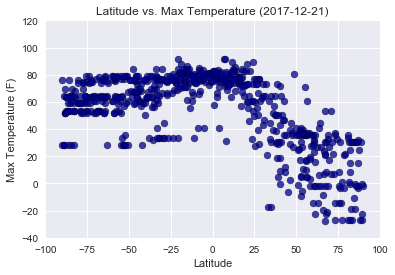

In [50]:
#set facecolor of all graphs
sns.set(style="darkgrid")

latitudeplt = citydf["Latitude"]
temperatureplt = citydf["Max Temp"]

plt.grid(color="white")
plt.ylim(-40, 120)
plt.xlim(-100, 100)
plt.title("Latitude vs. Max Temperature (%s)" % today)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(latitudeplt, temperatureplt, marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.75)

plt.show()

# Latitude vs Humidity

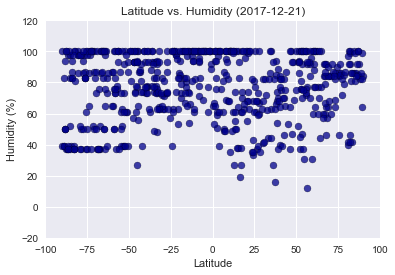

In [52]:
humidityplt = citydf["Humidity"]
#plt.grid(color="white")
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.title("Latitude vs. Humidity (%s)" % today)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(latitudeplt, humidityplt, marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.75)

plt.show()

# Latitude vs Cloudiness

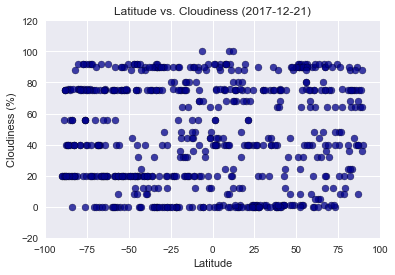

In [54]:
cloudinessplt = citydf["Cloudiness"]
#plt.grid(color="white")
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.title("Latitude vs. Cloudiness (%s)" % today)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(latitudeplt, cloudinessplt, marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.75)

plt.show()

# Latitude vs Wind Speed

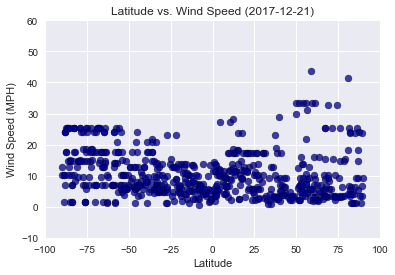

In [56]:
windplt = citydf["Wind Speed"]
#plt.grid(color="white")
plt.ylim(-10, 60)
plt.xlim(-100, 100)
plt.title("Latitude vs. Wind Speed (%s)" % today) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.scatter(latitudeplt, windplt, marker="o", facecolors="darkblue", edgecolors="black",
             alpha=0.75)

plt.show()